## 12 Logistic Regression pada binary Classification Task 

## Formula dasar

### Simple Linear Regression
- y = a + Bx
- g(x) = a + bx

### Multiple Linear Regression
- y = a + B1X1 + B2X2 + ... + BnXn
- g(X) = a + bX

### Logistic Linear Regression
- g(X) = sigmoid(a + B X)
- sigmoid(x) = 1 per 1+exp(-x)

## Dataset: SMS Spam Collection Data Set

In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Vince\BELAJAR MACHINE LEARNING\scikti learn\dataset\sms+spam+collection\SMSSpamCollection',
                 sep='\t', # Pada kode ini, kamu menggunakan sep='\t', yang artinya file tersebut dipisahkan dengan tab.
                 names=['label', 'sms'])  # names adalah parameter yang digunakan untuk memberikan nama kolom pada DataFrame yang dihasilkan oleh pd.read_csv() 
df.head()


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

#### Data yang ber lable ham itu ada 4825, dan bacanya sama kaya untuk di spam

## Training & Testing Set

In [6]:
from sklearn.preprocessing import LabelBinarizer

X = df['sms'].values
y = df['label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel() ## mengkonveriskan hasil dari fit_transform ke array 1 dimensi
lb.classes_

# jadi ham itu 0 dan spam itu 1

array(['ham', 'spam'], dtype='<U4')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=0
)

print(X_train, '\n')
print(y_train)

['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] 

[0 1 0 ... 1 0 0]


## Feature Extraction dengang TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_test_tfidf)

  (0, 514)	0.1927334001637576
  (0, 1445)	0.1382827072511541
  (0, 2047)	0.13162798135796389
  (0, 2968)	0.27854746638774186
  (0, 2969)	0.3854668003275152
  (0, 3042)	0.1927334001637576
  (0, 3209)	0.39934447916594623
  (0, 3520)	0.1927334001637576
  (0, 3748)	0.3094540850830667
  (0, 3880)	0.17728009081609516
  (0, 4117)	0.1927334001637576
  (0, 4168)	0.17230523637809714
  (0, 4328)	0.17230523637809714
  (0, 4358)	0.11021504619906547
  (0, 4861)	0.1323590112023461
  (0, 4885)	0.1927334001637576
  (0, 5279)	0.1338971667568563
  (0, 5597)	0.11346900297119589
  (0, 6144)	0.1927334001637576
  (0, 6392)	0.1927334001637576
  (0, 7035)	0.14502188177850336
  (0, 7185)	0.1927334001637576
  (0, 7241)	0.11253343579528909
  (1, 2796)	0.5385694788086677
  (1, 3423)	0.5096319958358703
  :	:
  (1390, 3212)	0.21977727352201232
  (1390, 3469)	0.26232724371205407
  (1390, 4235)	0.21599567193954447
  (1390, 4289)	0.2456427405190895
  (1390, 4615)	0.24022966937187437
  (1390, 4746)	0.3079773201548378
  

## Binary Classification dengan Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

for pred, sms in zip(y_pred[:5], X_test[:5]):
    print(f'PRED: {pred} - SMS: {sms}\n')

# PRED: 0 berarti model memprediksi SMS tersebut bukan spam.
# SMS adalah pesan yang dimasukkan ke model untuk klasifikasi.

PRED: 0 - SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@

PRED: 0 - SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.

PRED: 0 - SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed

PRED: 0 - SMS: Sir Goodmorning, Once free call me.

PRED: 0 - SMS: All will come alive.better correct any good looking figure there itself..



## Evaluation Metrics pada Binary Classification

- Confusion Matrix
- Accuarcy
- Precission & Recall
- F1 Score
- ROC

## Terminologi Dasar
#### Intinya, TP dan TN adalah saat tebakan kamu benar, sedangkan FP dan FN adalah saat tebakan kamu salah. Semakin banyak TP dan TN, semakin bagus performa tebakan kamu!


- True Positive (TP) = Ini kayak kamu menebak "ini adalah sesuatu yang kamu suka" dan ternyata bener, itu memang sesuatu yang kamu suka!
- True Negative (TN) = Ini kayak kamu menebak "ini bukan sesuatu yang aku suka" dan ternyata bener, itu memang bukan sesuatu yang kamu suka
- False Positive (FP) = Ini kayak kamu menebak "ini adalah sesuatu yang aku suka" tapi ternyata salah, itu bukan sesuatu yang kamu suka.
- False Negative (FN) = Ini kayak kamu menebak "ini bukan sesuatu yang aku suka" tapi ternyata salah, itu malah sesuatu yang kamu suka

#### Analogi
#### TP: Kamu benar tebak 64GB, dan itu memang 64GB.
#### TN: Kamu benar tebak 128GB, dan itu memang 128GB.
#### FP: Kamu salah tebak 512GB, dan ternyata cuma 64GB.
#### FN: Kamu salah tebak 64GB, padahal seharusnya 128GB.

## Confusion Matrix

#### Confusion matrix seringkali juga dikenal sebagai error matrix

In [11]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1207,    1],
       [  47,  138]], dtype=int64)

In [12]:
tn, fp, fn, tp = matrix.ravel)

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 1207
FP: 1
FN: 47
TP: 138


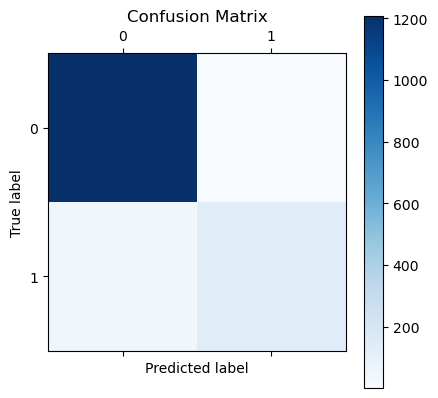

In [13]:
import matplotlib.pyplot as plt

plt.matshow(matrix, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Warna kuning cerah (1207, di pojok kiri atas) → True Negative (TN), jumlahnya paling banyak.
# Warna ungu tua (1, di pojok kanan atas) → False Positive (FP), jumlahnya paling sedikit.


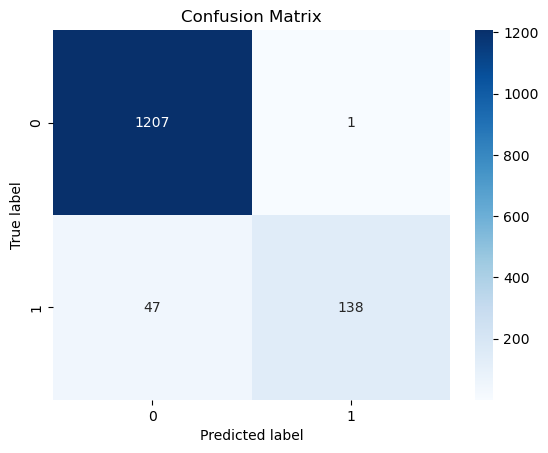

In [14]:
import seaborn as sns  
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d', cbar=True)  
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## Accuracy 
#### Accuracy mengukur porsi dari hasil prediksi yang tepat.
#### Accuracy = TP + TN per TP + TN + FP + FN = correct per total

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9655419956927495

## Precission & Recall

#### Selain menggunakan accuracy, performa dari suatu classifier umumnya juga diukur berdasarkan nilai Precission dan recall.

## Precission or Positive Predict Value (PPV)

#### Precission = TP per TP+FP

In [16]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.9928057553956835

## recall or True Positive Rate (TPR) or sensitivity

#### Recall = TP per TP+FN

In [17]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.745945945945946

## F1-SCORE
#### F1-Score atau F1-measure adalah harmonic mean dari precission dan recall.

#### F1 score = precission X recal per precission + recall

In [18]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8518518518518519

## ROC 
#### ROC menawarkan visualitasi terhadap perfoma dari classifier dengan membandingkan nilai recall (TPR) dan nilai Fallout(FPR)
#### Fallout = FP per TN+FP

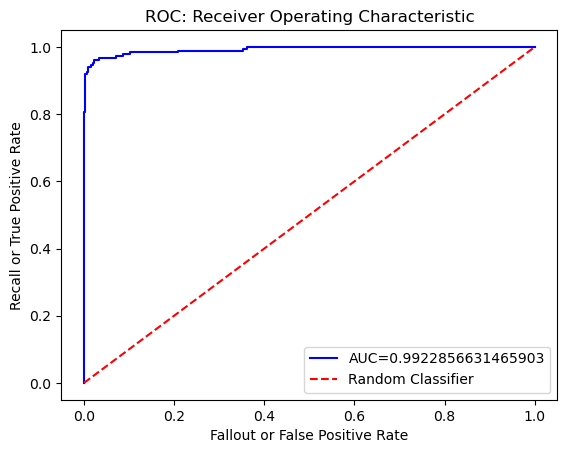

In [19]:
from sklearn.metrics import roc_curve, auc

prob_estimates = model.predict_proba(X_test_tfidf)

fpr, tpr, threshold = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()